## Name : Kamleshwar Viyanwar 
## Batch : C3
## Roll No : 43

In [1]:
!pip install ydata-profiling
!pip install livelossplot
!pip install tensorflow


  Obtaining dependency information for livelossplot from https://files.pythonhosted.org/packages/e3/fd/07864f0fdb2d279d2b777fd6ac1ce6e31d19b23b7bc9807145b076d49f2b/livelossplot-0.5.5-py3-none-any.whl.metadata
  Using cached livelossplot-0.5.5-py3-none-any.whl.metadata (8.7 kB)
Using cached livelossplot-0.5.5-py3-none-any.whl (22 kB)


In [2]:
import pandas as pd

# Load dataset
data = pd.read_csv('insurance.csv')

# Check the first few rows
data.head()


,person_id,age,sex,bmi,children,smoker,region,total_charges
0,1,19.0,female,27.900,0,yes,southwest,16884.9240
1,2,18.0,male,33.770,1,no,southeast,1725.5522
2,3,28.0,male,33.000,3,no,southeast,4449.4620
3,4,33.0,male,22.705,0,no,northwest,21984.4700
4,5,32.0,male,28.880,0,no,northwest,3866.8552


In [3]:
from ydata_profiling import ProfileReport

# Generate EDA report
profile = ProfileReport(data, title="Insurance EDA Report", explorative=True)
profile.to_file("insurance_eda_report.html")


C:\Users\cse\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## DNN

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load the dataset
data = pd.read_csv('insurance.csv')

# Step 2: Check column names to ensure no discrepancies
print("Columns in dataset:", data.columns)

# Step 3: Handle missing values
# Impute missing values for numeric columns (mean imputation)
numeric_columns = ['age', 'bmi', 'children']  # Specify numeric columns
categorical_columns = ['sex', 'smoker', 'region']  # Specify categorical columns

# Impute missing values for numeric columns with mean strategy
imputer_numeric = SimpleImputer(strategy='mean')
data[numeric_columns] = imputer_numeric.fit_transform(data[numeric_columns])

# Impute missing values for categorical columns with most frequent strategy
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

# Step 4: Separate features (X) and target (y)
X = data.drop('total_charges', axis=1)  # Features
y = data['total_charges']  # Target variable

# Step 5: Handle categorical data by one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Step 6: Scale numeric features using StandardScaler
scaler = StandardScaler()
X[['age', 'bmi', 'children']] = scaler.fit_transform(X[['age', 'bmi', 'children']])

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Build the Neural Network (DNN)
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer + hidden layer 1
    Dense(64, activation='relu'),  # Hidden layer 2
    Dense(32, activation='relu'),  # Hidden layer 3
    Dense(1, activation='linear')  # Output layer (for regression)
])

# Step 9: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Step 10: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Step 11: Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")

# Step 12: Save the trained model
model.save("insurance_prediction_model.h5")


Columns in dataset: Index(['person_id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'total_charges'],
      dtype='object')


C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 289626688.0000 - mae: 12610.7295 - val_loss: 309690688.0000 - val_mae: 12388.3760
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 281184384.0000 - mae: 12022.5459 - val_loss: 262746016.0000 - val_mae: 10585.9482
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 205826656.0000 - mae: 9662.1191 - val_loss: 210516336.0000 - val_mae: 10209.5576
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 202319712.0000 - mae: 10225.2246 - val_loss: 213282032.0000 - val_mae: 10638.4658
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 186682944.0000 - mae: 9892.4619 - val_loss: 211160176.0000 - val_mae: 10402.0469
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 190442192.0000 - mae: 9867.0244 - val_loss: 211774352.0000 - val_mae: 10492.1553
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180240448.0000 - mae: 9556.9395 - val_loss: 212106944.0000 - val_mae: 10540.0752
Epoch 8/100
34/34

In [12]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Load the saved model
loaded_model = load_model('insurance_prediction_model.h5')

# Step 2: Load the data (or use existing data if you already have it)
# Assuming you already have the X_test data in the correct format
# Make sure to apply the same preprocessing you did when training the model (e.g., scaling)

# Let's assume X_test is the test data you want to predict on.
# If you haven't standardized your test data yet, you need to do it:
scaler = StandardScaler()
X_test_std = scaler.fit_transform(X_test)  # Assuming X_test is your test features

# Step 3: Make predictions
predictions = loaded_model.predict(X_test_std)

# Step 4: Check the predictions
print(predictions)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[1.76343781e+02]
 [1.64161591e+02]
 [5.70764375e+04]
 [1.41528711e+03]
 [4.85087461e+04]
 [1.94112573e+03]
 [1.61866760e+02]
 [8.66875684e+03]
 [2.25850464e+02]
 [2.65538306e+03]
 [4.97543164e+04]
 [1.01502838e+03]
 [1.65335052e+02]
 [6.37204805e+04]
 [6.60425469e+04]
 [6.22129219e+04]
 [5.56438965e+03]
 [5.78510469e+04]
 [2.91540314e+02]
 [5.06060781e+04]
 [2.65539307e+02]
 [1.20274072e+03]
 [1.12709991e+02]
 [1.63752441e+02]
 [8.36497864e+02]
 [2.73482819e+02]
 [3.00364038e+03]
 [1.64032669e+02]
 [1.83840546e+02]
 [5.45809288e+01]
 [3.91926331e+02]
 [1.70783276e+03]
 [1.64074921e+02]
 [1.66825851e+02]
 [5.80542564e+01]
 [1.08037549e+03]
 [1.71597824e+02]
 [1.38609375e+02]
 [5.27173203e+04]
 [5.69601914e+04]
 [1.87900055e+02]
 [6.85329971e+01]
 [2.45114209e+03]
 [2.91418359e+03]
 [1.87339502e+03]
 [3.38481519e+03]
 [1.64894516e+02]
 [1.74369263e+02]
 [6.02586250e+04]
 [2.29678931e+03]
 [6.00563525e+03]
 [5.51500359e+01]
 [1.26342065e+03]
 [1.65222

Model compiled with loss and metrics: mean_squared_error ['loss', 'compile_metrics']
Epoch 1/100


C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 321991456.0000 - mae: 12402.7500

KeyError: 'loss'

<Figure size 640x480 with 0 Axes>

## Perceptron

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model

# Define the Perceptron model (Single-layer)
model_perceptron = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='linear')  # Output layer for regression
])

# Compile the model with Stochastic Gradient Descent (SGD) optimizer
model_perceptron.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['mae'])

# Train the model
history_perceptron = model_perceptron.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Save the trained model to a file
model_perceptron.save('insurance_perceptron_model.h5')
print("Perceptron model saved as 'insurance_perceptron_model.h5'")


Epoch 1/100


C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - m

Perceptron model saved as 'insurance_perceptron_model.h5'


In [14]:
# Load the saved model
loaded_perceptron_model = load_model('insurance_perceptron_model.h5')

# Make predictions on the test data
predictions_perceptron = loaded_perceptron_model.predict(X_test)

# Print the predictions
print("Predictions on the test set:")
print(predictions_perceptron)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predictions on the test set:
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [

## Define DNN

In [ ]:
# Define a DNN model
model_dnn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model_dnn.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dnn = model_dnn.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


## Learning Rates

In [12]:
# Trying different learning rates
from tensorflow.keras.optimizers import Adam

# Example of Adam optimizer with learning rate
model_dnn_adam = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model with Adam optimizer and a learning rate of 0.001
model_dnn_adam.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model with different epochs and batch sizes
history_dnn_adam = model_dnn_adam.fit(X_train, y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/200


C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 317723840.0000 - mae: 13192.8447 - val_loss: 287856288.0000 - val_mae: 11443.7822
Epoch 2/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 266994880.0000 - mae: 11216.7295 - val_loss: 213680848.0000 - val_mae: 10670.1436
Epoch 3/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 195637104.0000 - mae: 10177.1680 - val_loss: 212970960.0000 - val_mae: 10616.1738
Epoch 4/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184154144.0000 - mae: 9710.1191 - val_loss: 213537616.0000 - val_mae: 10680.7402
Epoch 5/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196600240.0000 - mae: 10217.9990 - val_loss: 211365056.0000 - val_mae: 10466.3379
Epoch 6/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201194880.0000 - mae: 10013.9824 - val_loss: 211529504.0000 - val_mae: 10502.0996
Epoch 7/200
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176882208.0000 - mae: 9661.9668 - val_loss: 211659792.0000 - val_mae: 10532.9082
Epoch 8/200
67/67 ━━━━━━━━━

## SGD optimzer

In [13]:
# SGD Optimizer
sgd_optimizer = SGD(learning_rate=0.01)
model_dnn_sgd = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_dnn_sgd.compile(optimizer=sgd_optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dnn_sgd = model_dnn_sgd.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Momentum Optimizer
momentum_optimizer = SGD(learning_rate=0.01, momentum=0.9)
model_dnn_momentum = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_dnn_momentum.compile(optimizer=momentum_optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dnn_momentum = model_dnn_momentum.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Nesterov Accelerated Gradient
nesterov_optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model_dnn_nesterov = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model_dnn_nesterov.compile(optimizer=nesterov_optimizer, loss='mean_squared_error', metrics=['mae'])

# Train the model
history_dnn_nesterov = model_dnn_nesterov.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100


C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - m

C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - m

C:\Users\cse\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - m

In [3]:
# Drop rows with missing values
data = data.dropna()

# Re-split features (X) and target (y) after dropping missing rows
X = data.drop('total_charges', axis=1)
y = data['total_charges']


## Comparing Model

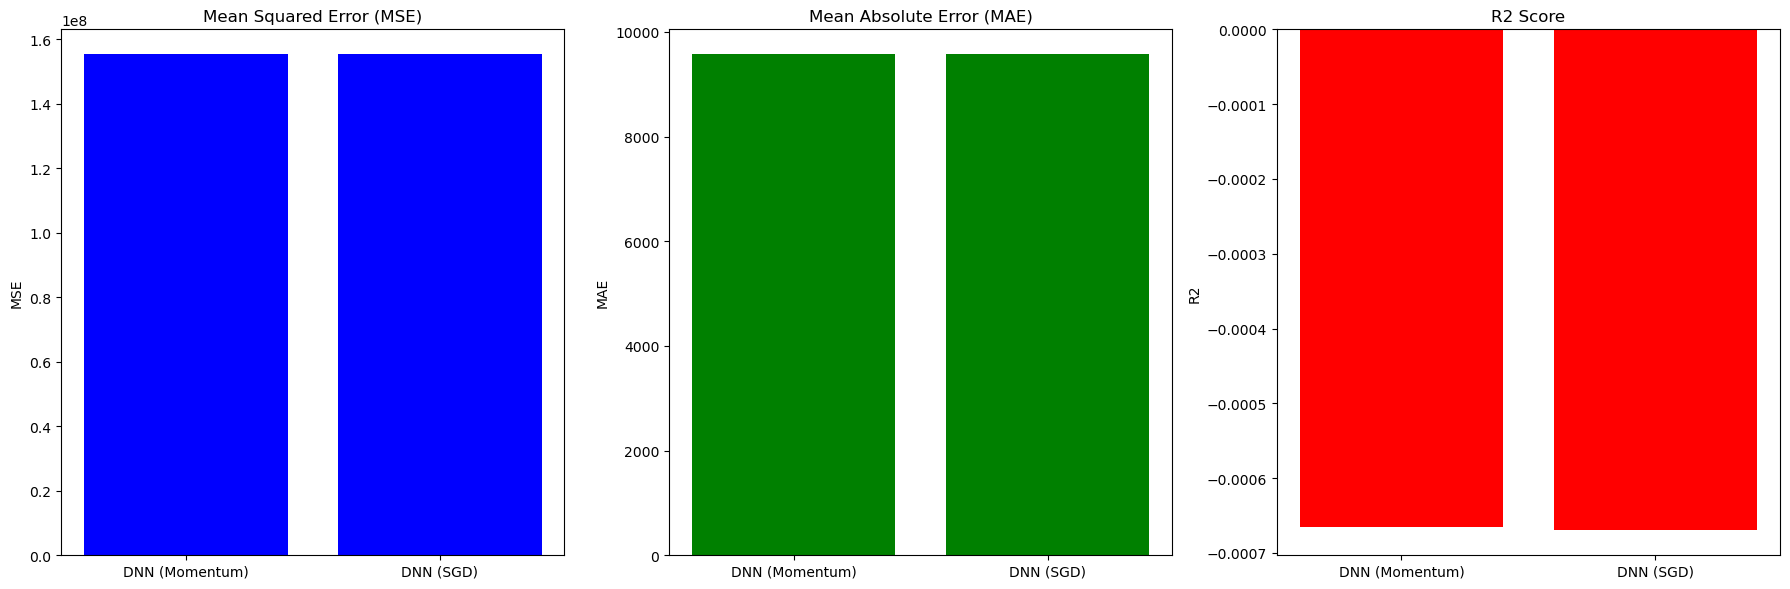

In [8]:
# Create a DataFrame to store evaluation results
results_df = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'MAE': mae_values,
    'R2': r2_values
})

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MSE Plot
axes[0].bar(results_df['Model'], results_df['MSE'], color='blue')
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# MAE Plot
axes[1].bar(results_df['Model'], results_df['MAE'], color='green')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# R2 Plot
axes[2].bar(results_df['Model'], results_df['R2'], color='red')
axes[2].set_title('R2 Score')
axes[2].set_ylabel('R2')

plt.tight_layout()
plt.show()


In [9]:
# Save the best model based on evaluation criteria (e.g., DNN with Adam optimizer)
best_model = dnn_model  # Assuming DNN (Adam) has the best performance
best_model.save('best_insurance_predictor_model.h5')


NameError: name 'dnn_model' is not defined